In [4]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

In [5]:
train = pd.read_csv("./dataset/train.csv")

In [3]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       25000 non-null  int64 
 1   reviews  25000 non-null  object
 2   target   25000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 586.1+ KB
None


In [4]:
train['target'].value_counts()

5    10000
2     8000
1     4500
4     2500
Name: target, dtype: int64

In [28]:
train_1 = train[train["target"] == 1]

In [32]:
train_1["len"].describe()

count    4500.000000
mean       47.144889
std        33.041076
min         7.000000
25%        20.000000
50%        37.000000
75%        68.000000
max       140.000000
Name: len, dtype: float64

/var/folders/sk/psgbbsdd7y55t7_j82g1lgrw0000gn/T/ipykernel_3438/201439028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_1["len"] = train_1["reviews"].str.len()


<AxesSubplot:xlabel='len', ylabel='len'>

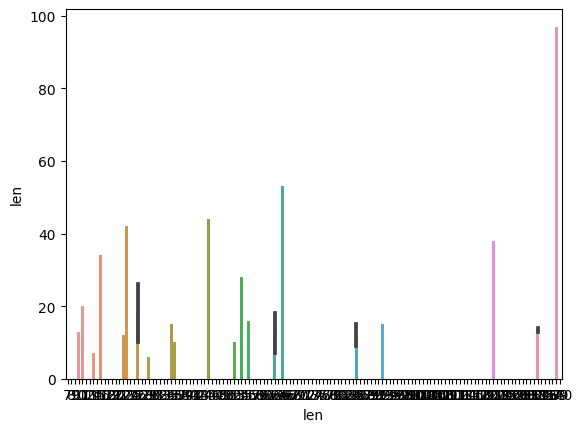

In [31]:
train_1["len"] = train_1["reviews"].str.len()
sb.barplot(x="len", y= train_1["len"].value_counts(), data=train_1)

In [1]:
from hanspell import spell_checker
import re

In [10]:
train["reviews"][0]

'조아요 처음구입 싸게햇어요'

In [15]:
a = train["reviews"][0]
pattern = re.compile("[^가-힣0-9+]")
print(pattern.sub("", a))

조아요처음구입싸게햇어요


In [6]:
for data in train["reviews"]:
    pattern = re.compile("[^ 가-힣0-9+]")
    pattern_check = pattern.sub("", data)
    spell_check = spell_checker.check(pattern_check)
    result = spell_check.checked
    if data != result:
        print(f"before : {data}")
        print(f"after : {result}")

before : 조아요 처음구입 싸게햇어요
after : 좋아요 처음 구입 싸게 했어요
before : 생각보다 잘 안돼요 매지 바른지 하루밖에 안됐는데ㅠㅠ 25천원가량 주고 사기 너무 아깝네요
after : 생각보다 잘 안돼요 매지 바른지 하루밖에 안됐는데 25천 원가량 주고 사기 너무 아깝네요
before : 디자인은괜찮은데 상품이 금이가서 교환했는데 두번째받은상품도 까져있고 안쪽에 금이가져있네요 ㅠ 귀찮아서 그냥쓰려구요 배송기사님은 친절하셨어요
after : 디자인은 괜찮은데 상품이 금이 가서 교환했는데 두 번째 받은 상품도 까져있고 안쪽에 금이 가져있네요 귀찮아서 그냥 쓰려고요 배송기사님은 친절하셨어요
before : 기전에 이 제품말고 이마트 트레이더스에서만 팔던 프리미엄 제품을 사용했었습니다. 샘플 써보고 마음에 들어 구매해 사용중 같은 제품을 팔지 않아 할수 없이 플러스를 구매했는데요, 감고나도 머리가 개운하지 않고 간지럽네요. 저랑은 잘 안맞는듯해요.
after : 기 전에 이 제품 말고 이마트 트레이더스에서만 팔던 프리미엄 제품을 사용했었습니다 샘플 써보고 마음에 들어 구매해 사용 중 같은 제품을 팔지 않아 할 수 없이 플러스를 구매했는데요 감고 나도 머리가 개운하지 않고 간지럽네요 저랑은 잘 안 맞는듯해요
before : 튼튼하고 손목을 잘 받쳐주네요~
after : 튼튼하고 손목을 잘 받쳐주네요
before : 배송은 먼저 구입하신 분들께서 오래걸린다고 하여 참고 기달렸습니다 생각보다 일찍도착해서 좋았구요,하루전날 배송 아저씨가 전화와서 내일1~3시사이에 온다고 하더니 7시에왔어요화나
after : 배송은 먼저 구입하신 분들께서 오래 걸린다고 하여 참고 기다렸습니다 생각보다 일찍 도착해서 좋았고요 하루 전날 배송 아저씨가 전화 와서 내일 13시 사이에 온다고 하더니 7시에 왔어 요화나
before : 타이밍이 좋았는지 배송도 빠르고 맛있었어요! 크기가 두가지가 있길래 큰걸 사봤는데 기존에 사먹어봤던거랑 크기 차이는 없네요 그래도 신선하고 맛

KeyboardInterrupt: 